# Exploit VS Exploration: E-greedy 

<img src="Images/lab4_1.png">
<img src="Images/lab4_2.png">
<img src="Images/lab4_3.png">

# Exploit VS Exploration: add random noise

<img src="Images/lab4_4.png">
<img src="Images/lab4_5.png">

# E-greedy와 add random noise의 차이 & 최적화 방법

E-greedy는 완전히 랜덤하게 선택 되지만, add random noise는 기존의 값에 noise_values가 추가되는 것이므로, 상대적으로 높은 Q-learning 함수 값을 가지는 방향으로 선택될 확률이 높다. (첫 번째 값에 매우 적은 noise_value가 추가되더라도 2, 3번째 값이 선택 될 확률이 4, 5번째 보다 상대적으로 높다.)

<img src="Images/lab4_6.png">
<img src="Images/lab4_7.png">
<img src="Images/lab4_8.png">
<img src="Images/lab4_9.png">
<img src="Images/lab4_10.png">
<img src="Images/lab4_11.png">

# Code: Setup

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False}
)

env = gym.make('FrozenLake-v3')

[2017-07-01 15:12:18,329] Making new env: FrozenLake-v3


# add random noise

Success rate: 0.973
Final Q-Table Values
[[ 0.          0.          0.95099005  0.        ]
 [ 0.          0.          0.96059601  0.        ]
 [ 0.          0.970299    0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.9801      0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.99        0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.99        0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.        ]]


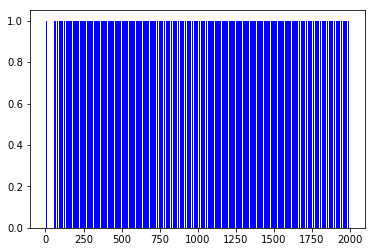

In [3]:
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# Discount factor
dis = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        #np.random.randn : 표준 분포 내에서 랜덤 값 반환 (1, env.action_space.n) 형태로
        #노이즈 추가

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using decay rate
        Q[state, action] = reward + dis * np.max(Q[new_state, :])

        rAll += reward
        state = new_state

    rList.append(rAll)

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

#지연된 보상에는 가중치를 낮추었기 때문에 더미 Q-learning과 달리 0, 1외의 값이 출력된다.

# e-greedy

Success rate: 0.7905
Final Q-Table Values
[[ 0.94148015  0.95099005  0.93206535  0.94148015]
 [ 0.94148015  0.          0.92274469  0.93206535]
 [ 0.93206535  0.          0.          0.        ]
 [ 0.92274469  0.          0.          0.        ]
 [ 0.95099005  0.96059601  0.          0.94148015]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.9801      0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.96059601  0.          0.970299    0.95099005]
 [ 0.96059601  0.9801      0.9801      0.        ]
 [ 0.970299    0.99        0.          0.970299  ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.9801      0.99        0.970299  ]
 [ 0.9801      0.99        1.          0.9801    ]
 [ 0.          0.          0.          0.        ]]


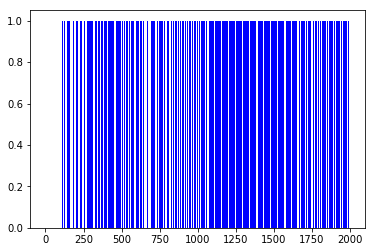

In [3]:
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# Set learning parameters
dis = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    e = 1. / ((i // 100) + 1)  # Python2&3

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by e greedy
        if np.random.rand(1) < e:
            #np.random.rand() : 0~1 사이의 랜덤 값
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = reward + dis * np.max(Q[new_state, :])

        rAll += reward
        state = new_state

    rList.append(rAll)

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()